In [ ]:
Mouse = [['x1', 'y1'], ['x2', 'y2']]
Target = [['xA', 'yA'], ['xB', 'yB']]

out = [i+j for i,j in zip(Mouse, Target)]
out

[['x1', 'y1', 'xA', 'yA'], ['x2', 'y2', 'xB', 'yB']]

In [ ]:
 Initialer  Start_uge  Start_dag Start_tid  End_uge  End_dag   End_tid
0      MBAU         18          3  09:00:00       18        5  12:00:00
1      MBAU         22          2  14:00:00       22        2  15:00:00
2      MBAU         13          4  09:00:00       13        4  10:00:00
3      AMPE         14          1  12:00:00       14        1  13:30:00
4      AMPE         26          6  09:00:00       27        2  22:00:00

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_clipboard()
df

In [ ]:
{'MBAU': [[(18, 3, 09:00:00), (18, 5, 12:00:00)],
          [(22, 2, 14:00:00), (22, 2, 15:00:00)],
          [(13, 4, 09:00:00), (13, 4, 10:00:00)]],

 'AMPE': [[(14, 1, 12:00:00), (14, 1, 13;30:00)],
          [(26, 6, 09:00:00), (27, 2, 22:00:00)]] }

In [ ]:
from collections import defaultdict

d = defaultdict(list)

for _,row in df.iterrows():
    vals = row.tolist()
    d[vals[0]].append([tuple(vals[1:4]),tuple(vals[4:])])
    
output = dict(d)
output

In [ ]:
init = df['Initialer'].tolist()
start_tuple = df[['Start_uge', 'Start_dag', 'Start_tid']].apply(tuple, axis=1)
end_tuple = df[['End_uge', 'End_dag', 'End_tid']].apply(tuple, axis=1)

items = zip(init, start_tuple, end_tuple)

d = defaultdict(list)

for i,j,k in items:
    d[i].append([j,k])

output = dict(d)
output

In [ ]:
start_tuple = df[['Initialer','Start_uge', 'Start_dag', 'Start_tid']].apply(tuple, axis=1)
start_dict = {k:[] for k in df.Initialer.unique()}
[start_dict[initialer].append((x,y,z)) for initialer, x, y, z in start_tuple]
print(start_dict)
[None, None, None, None, None]

{'MBAU': [(18, 3, '09:00:00'), (22, 2, '14:00:00'), (13, 4, '09:00:00')], 'AMPE': [(14, 1, '12:00:00'), (26, 6, '09:00:00')]}

In [ ]:
grouper = df.groupby('Initialer').apply(lambda x: [x.tolist()[1:4],x.tolist()[4:]])

In [ ]:
grouper

In [ ]:
df.columns[1:]

In [ ]:
arr = [[ '0', 'A', 'M', 'P', '0', '0', 'a', '0', '0', '0'],
       [ '0', 'H', '0', 'Q', '0', '0', 't', '0', '0', '0'],
       [ 'q', 'C', 'M', 'P', 'r', '0', '0', '0', 'w', 'i'],
       [ '0', 'H', '0', 'P', '0', 't', 'h', '0', '0', '0'],
       [ '0', 'C', 'M', 'Q', 'r', '0', '0', '0', 'r', 'p']]

In [ ]:
max(lst,key=lst.count)

In [ ]:
items = [max(i,key=list(map(lambda x: x if x.isalpha() else None, i)).count) for i in zip(*arr)]# if j.isalpha()]
items

In [ ]:
items = [list(filter(lambda x: x.isalpha(), i)) for i in zip(*arr)]# if j.isalpha()]
items

In [ ]:
arr = [[ '0', 'A', 'M', 'P', '0', '0', 'a', '0', '0', '0'],
       [ '0', 'H', '0', 'Q', '0', '0', 't', '0', '0', '0'],
       [ 'q', 'C', 'M', 'P', 'r', '0', '0', '0', 'w', 'i'],
       [ '0', 'H', '0', 'P', '0', 't', 'h', '0', '0', '0'],
       [ '0', 'C', 'M', 'Q', 'r', '0', '0', '0', 'r', 'p']]


import numpy as np
arr = np.array(arr).T

In [ ]:
np.array(map(str.isalpha, arr))

In [ ]:
np.where(np.vectorize(str.isalpha)(arr),arr, None)

In [ ]:
f = np.vectorize(str.isalpha)

In [ ]:
np.unique(arr, return_counts=True, axis=1)

In [ ]:
df = pd.read_clipboard()

In [ ]:
df[df.loc[::-1, 'col'].isna().cumsum()[::-1]==0]

In [ ]:
   col
0  1.0
1  2.0
2  NaN
3  NaN
4  3.0
5  NaN
6  4.0
7  5.0
8  NaN

In [ ]:
df = pd.DataFrame([1,0,0,2,2,1,3,4,4,3], columns=['col'])

grouper = df.groupby('col')

In [ ]:
[tuple(i) for i in grouper.indices.values()]

In [ ]:
import pandas as pd
# load data
training_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_training_data.csv.xz")
tournament_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_tournament_data.csv.xz")

feature_cols = training_data.columns[training_data.columns.str.startswith('feature')]
# select those columns out of the training dataset
X_train = training_data[feature_cols].to_numpy()
# select target variables
y_train = training_data.loc[:,'target'].to_numpy()

#same thing on validation data
val_data = tournament_data[tournament_data.data_type=='validation']
X_val = val_data[feature_cols]
y_val= val_data.loc[:,'target']

In [ ]:
training_data.head()

In [ ]:
training_data.shape

In [ ]:
feature_cols = training_data.columns[training_data.columns.str.startswith('feature')]
# select those columns out of the training dataset
X_train = training_data[feature_cols].to_numpy()
# select target variables
y_train = training_data.loc[:,'target'].to_numpy()

In [ ]:
from tensorflow.keras import models, layers

dropout_rate = 0.50

model = models.Sequential()
model.add(layers.Dense(512, input_shape=(X_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))

model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer='adam',
  loss='mse',metrics=['mae'])

history = model.fit(X_train, y_train,
          #validation_data=(X_val, y_val),
          batch_size=512,
          epochs=5,
          verbose=1)

# Prediction output
predictions_df = model.predict(X_train)
predictions_df = predictions_df.reshape(len(predictions_df))

pred_max = predictions_df.max()
pred_min = predictions_df.min()
pred_range = pred_max - pred_min

print(pred_max, pred_min, pred_range)
0.73566914 0.1063129 0.62935627

In [ ]:
# Prediction output
predictions_df = model.predict(X_train)
predictions_df = predictions_df.reshape(len(predictions_df))

pred_max = predictions_df.max()
pred_min = predictions_df.min()
pred_range = pred_max - pred_min

print(pred_max, pred_min, pred_range)
# example output: 0.51895267 0.47968164 0.039271027

In [ ]:
#Without regularization 0.7, 0.1
#Without batchnorm 0.69, 0.23

#Reducing neurons by half 0.67 0.35

#Sigmoid 0.60 0.36
#removing output relu 0.69, 0.29
#relu 0.73 0.10

In [ ]:
sigma_n = np.array([0.01, 0.1])

ls = np.array([0.1, 0.2])

for sigma_ni in sigma_n:
    for ls_i in ls:
        print("{},{}".format(sigma_ni, ls_i))

In [ ]:
from itertools import product

items = product(sigma_n, ls)

for i in items:
    print(i)

In [ ]:
items = product(sigma_n, ls)

type(items)

In [ ]:
type(product(range(1)))

In [40]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, losses, applications, utils
from tensorflow.keras.layers import LSTM, Dense, Input

In [44]:
def create_cnn_lstm_model_f_api(input_shape):

    model = Sequential()
    cnn = tensorflow.keras.applications.DenseNet169(include_top=True, 
                                                    weights=None, 
                                                    input_tensor=None, 
                                                    input_shape=input_shape[1:], #<--------
                                                    pooling=None, classes=2)
    
    # define LSTM model
    
    model.add(Input(input_shape, ragged=True))
    
    model.add(tensorflow.keras.layers.TimeDistributed(cnn))
    
    model.add(LSTM(units = 512, 
                   dropout=0.5, 
                   recurrent_dropout=0.3, 
                   return_sequences = True))
    
    model.add(LSTM(units = 512, 
                   dropout=0.5, 
                   recurrent_dropout=0.3, 
                   return_sequences = False))
    
    model.add(Dense(units=NUM_CLASSES, 
                    activation='sigmoid'))#Compile

    model.compile(loss=tensorflow.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    return model

input_shape = (None, 128, 216, 1)
NUM_CLASSES = 2

model = create_cnn_lstm_model_f_api(input_shape)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, None, 2)           12639938  
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 512)         1054720   
_________________________________________________________________
lstm_13 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1026      
Total params: 15,794,884
Trainable params: 15,636,484
Non-trainable params: 158,400
_________________________________________________________________
None


In [135]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, applications

In [140]:
def cnn_model(image):
    
    inp = layers.Input(image)
    x = layers.Conv2D(8, 3)(inp)
    x = layers.MaxPool2D(3)(x)
    x = layers.Conv2D(16, 3)(x)
    x = layers.MaxPool2D(3)(x)
    x = layers.Conv2D(32, 3)(x)
    x = layers.MaxPool2D(3)(x)
    x = layers.Flatten()(x)
    out = layers.Dense(2, activation='sigmoid')(x)
    
    model = Model(inp, out)
    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics='accuracy')
    
    return model

[(5, 128, 216, 1), (5, 128, 216, 1), (9, 128, 216, 1), (6, 128, 216, 1), (4, 128, 216, 1)]


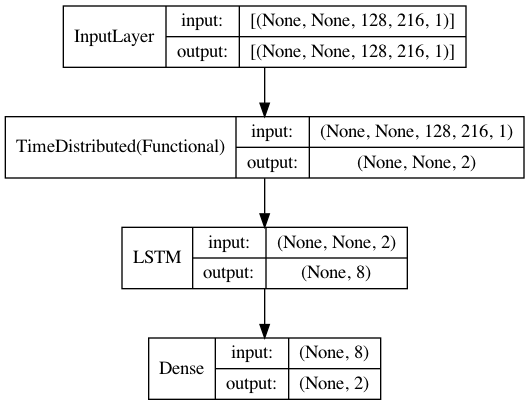

In [148]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, applications

num_audio = 5

data = []

for i in range(num_audio):
    n_images = np.random.randint(4,10)
    data.append(np.random.random((n_images,128,216,1)))
    
print([i.shape for i in data])

#[(5, 128, 216, 1), (5, 128, 216, 1), (9, 128, 216, 1), (6, 128, 216, 1), (4, 128, 216, 1)]

#Convert each set of images (for each audio) to tensors and then a ragged tensor
tensors = [tensorflow.convert_to_tensor(i) for i in data]
X_train = tensorflow.ragged.stack(tensors).to_tensor()

y_train = tensorflow.convert_to_tensor(np.random.randint(0,2,(5,2)))


#Create model
inp = layers.Input((None,128,216,1), ragged=True)

cnn = tensorflow.keras.applications.DenseNet169(include_top=True, 
                                                weights=None, 
                                                input_tensor=None, 
                                                input_shape=(128,216,1), #<--------
                                                pooling=None, classes=2)


x = layers.TimeDistributed(cnn)(inp)
x = layers.LSTM(8)(x)
out = layers.Dense(2)(x)

model = Model(inp, out)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

utils.plot_model(model, show_shapes=True, show_layer_names=False)


model.fit(X_train, y_train, epochs=2)


Epoch 1/2
WARNING:tensorflow:5 out of the last 5 calls to <function Model.make_train_function.<locals>.train_function at 0x7f8e55b4fe50> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
1/1 [==============================] - 37s 37s/step - loss: 3.4057 - accuracy: 0.4000
Epoch 2/2
1/1 [==============================] - 16s 16s/step - loss: 3.3544 - accuracy: 0.4000

In [150]:
X_train.shape

TensorShape([5, 9, 128, 216, 1])

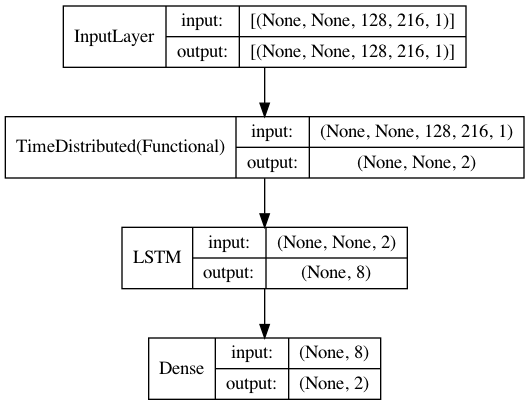

In [151]:
utils.plot_model(model, show_shapes=True, show_layer_names=False, )

[(4, 128, 216, 1), (4, 128, 216, 1), (4, 128, 216, 1), (7, 128, 216, 1), (6, 128, 216, 1)]


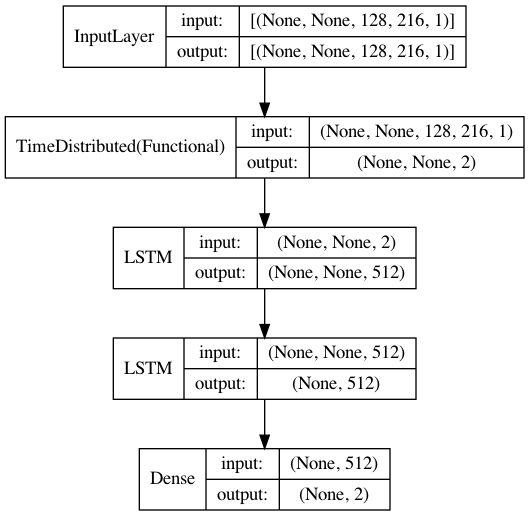

In [120]:
import tensorflow as tf
from tensorflow.keras import layers, Model, utils, applications

#Creating dummy audio mel-spectrograms
num_audio = 5

data = []

for i in range(num_audio):
    n_images = np.random.randint(4,10)
    data.append(np.random.random((n_images,128,216,1)))
    
print([i.shape for i in data])

#[(5, 128, 216, 1), (6, 128, 216, 1), (7, 128, 216, 1), (8, 128, 216, 1), (6, 128, 216, 1)]

#Convert each set of images (for each audio) to tensors and then a ragged tensor
tensors = [tensorflow.convert_to_tensor(i) for i in data]
X_train = tensorflow.ragged.stack(tensors)

y_train = tensorflow.convert_to_tensor(np.random.randint(0,2,(5,2)))

#Build Model
inp = layers.Input((None,128,216,1), ragged=True)

# cnn = tensorflow.keras.applications.DenseNet169(include_top=True, 
#                                                 weights=None, 
#                                                 input_tensor=None, 
#                                                 input_shape=(128,216,1), #<--------
#                                                 pooling=None, classes=2)



x = layers.TimeDistributed(cnn)(inp)
x = layers.LSTM(512, dropout=0.5, recurrent_dropout=0.3, return_sequences = True)(x)
x = layers.LSTM(512, dropout=0.5, recurrent_dropout=0.3, return_sequences = False)(x)
out = layers.Dense(2, activation='sigmoid')(x)

model = Model(inp, out)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [121]:
model.fit(X_train, y_train)

TypeError: in user code:

    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/wrappers.py:224 call
        y = self.layer(inputs.values, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/convolutional.py:2880 call
        return backend.spatial_2d_padding(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:3449 spatial_2d_padding
        return array_ops.pad(x, pattern)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:3422 pad
        result = gen_array_ops.pad(tensor, paddings, name=name)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:6484 pad
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:525 _apply_op_helper
        raise err
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:517 _apply_op_helper
        values = ops.convert_to_tensor(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/profiler/trace.py:163 wrapped
        return func(*args, **kwargs)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1540 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:339 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:264 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:281 _constant_impl
        tensor_util.make_tensor_proto(
    /Users/akshay/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:551 make_tensor_proto
        raise TypeError("Failed to convert object of type %s to Tensor. "

    TypeError: Failed to convert object of type <class 'tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor'> to Tensor. Contents: tf.RaggedTensor(values=Tensor("model_23/Cast_1:0", shape=(None, 216, 1), dtype=float32), row_splits=Tensor("RaggedFromVariant/RaggedTensorFromVariant:1", shape=(None,), dtype=int64)). Consider casting elements to a supported type.


In [152]:
l = [[['30/09/2015', 'C', 'ETERNITON NM H', '1,73', '400']],
 [['05/08/2019', 'C', 'CIELOON NM', '7,75', '500'],
  ['05/08/2019', 'C', 'M.DIASBRANCOON NM', '39,40', '100'],
  ['05/08/2019', 'C', 'M.DIASBRANCOON NM', '39,40', '100'],
  ['05/08/2019', 'C', 'M.DIASBRANCOON NM', '39,40', '100']],
 [['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '9'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'CETIPON NM H', '31,17', '10'],
  ['25/03/2015', 'C', 'WEGON EJ NM H', '30,88', '99']],
 [['16/12/2019', 'C', 'IRBBRASIL REON NM', '36,72', '100'],
  ['16/12/2019', 'C', 'ITAUUNIBANCOON EJ N1', '31,45', '200']]]

In [160]:
import pandas as pd

flat = [row for item in l for row in item]
df = pd.DataFrame(flat, columns=['A','B','C','D','E'])
print(df)

             A  B                     C      D    E
0   30/09/2015  C        ETERNITON NM H   1,73  400
1   05/08/2019  C            CIELOON NM   7,75  500
2   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
3   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
4   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
5   25/03/2015  C          CETIPON NM H  31,17   10
6   25/03/2015  C          CETIPON NM H  31,17    9
7   25/03/2015  C          CETIPON NM H  31,17   10
8   25/03/2015  C          CETIPON NM H  31,17   10
9   25/03/2015  C          CETIPON NM H  31,17   10
10  25/03/2015  C          CETIPON NM H  31,17   10
11  25/03/2015  C          CETIPON NM H  31,17   10
12  25/03/2015  C          CETIPON NM H  31,17   10
13  25/03/2015  C          CETIPON NM H  31,17   10
14  25/03/2015  C          CETIPON NM H  31,17   10
15  25/03/2015  C         WEGON EJ NM H  30,88   99
16  16/12/2019  C     IRBBRASIL REON NM  36,72  100
17  16/12/2019  C  ITAUUNIBANCOON EJ N1  31,45  200

             A  B                     C      D    E
0   30/09/2015  C        ETERNITON NM H   1,73  400
1   05/08/2019  C            CIELOON NM   7,75  500
2   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
3   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
4   05/08/2019  C     M.DIASBRANCOON NM  39,40  100
5   25/03/2015  C          CETIPON NM H  31,17   10
6   25/03/2015  C          CETIPON NM H  31,17    9
7   25/03/2015  C          CETIPON NM H  31,17   10
8   25/03/2015  C          CETIPON NM H  31,17   10
9   25/03/2015  C          CETIPON NM H  31,17   10
10  25/03/2015  C          CETIPON NM H  31,17   10
11  25/03/2015  C          CETIPON NM H  31,17   10
12  25/03/2015  C          CETIPON NM H  31,17   10
13  25/03/2015  C          CETIPON NM H  31,17   10
14  25/03/2015  C          CETIPON NM H  31,17   10
15  25/03/2015  C         WEGON EJ NM H  30,88   99
16  16/12/2019  C     IRBBRASIL REON NM  36,72  100
17  16/12/2019  C  ITAUUNIBANCOON EJ N1  31,45  200


In [164]:
ds = pd.DataFrame({"col_a":[1,2,3], "col_b":[5,4,0],"col_c":[9,7,6]})

cols=[["col_a","col_b"],
      ["col_c","col_b"],
      ["col_a","col_b"]]

In [163]:
ds

,col_a,col_b,col_c
0,1,5,9
1,2,4,7
2,3,0,6


In [182]:
[ds.loc[i,j].tolist() for i,j in enumerate(cols)]

[[1, 5], [7, 4], [3, 0]]

In [185]:
import pandas as pd
df = pd.DataFrame({ 
'ID': ['ABC', 'ABC', 'ABC', 'XYZ', 'XYZ', 'XYZ'], 
'value': [100, 120, 130, 200, 190, 210],
'value2': [2100, 2120, 2130, 2200, 2190, 2210],   
'state': ['init','mid', 'final', 'init', 'mid', 'final'], 
})

In [186]:
df

,ID,value,value2,state
0,ABC,100,2100,init
1,ABC,120,2120,mid
2,ABC,130,2130,final
3,XYZ,200,2200,init
4,XYZ,190,2190,mid
5,XYZ,210,2210,final


In [191]:
dict(enumerate(df.ID.unique()))

{0: 'ABC', 1: 'XYZ'}

In [227]:
df_a = pd.DataFrame(data={
    'a': [1, 0, 1, 0, 0, 0],
    'b': [2, 0, 2, 0, 0, 0], 
    'c': [3, 0, 2, 0, 0, 0],
    'd': ['foo', 'foo', 'foo', 'foo', 'foo', 'foo'],
    'e': ['bar','bar','bar','bar','bar','bar']
})

df_b = pd.DataFrame(data={
    'a': [1, 0, 2, 0, 0, 0],
    'b': [2, 0, 2, 0, 0, 0], 
    'c': [3, 0, 2, 0, 0, 0]
})

In [228]:
df_a[df_b.columns] = df_b | df_a[df_b.columns]
print(df_a)

   a  b  c    d    e
0  1  2  3  foo  bar
1  0  0  0  foo  bar
2  3  2  2  foo  bar
3  0  0  0  foo  bar
4  0  0  0  foo  bar
5  0  0  0  foo  bar


In [224]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
%matplotlib inline

#Sample data
x = [0,200,2,1,0,1,4,4,6,14,25,43,71,93,123,194,192]
num_components = 3

#Fit a model onto the data
data = np.array(x).reshape(-1,1)
model = GaussianMixture(n_components=num_components).fit(data)

clusters = model.predict(data)
df = pd.DataFrame(list(zip(x, clusters)), columns=['data', 'clusters'])

print(df)

    data  clusters
0      0         0
1    200         1
2      2         0
3      1         0
4      0         0
5      1         0
6      4         0
7      4         0
8      6         0
9     14         2
10    25         2
11    43         2
12    71         2
13    93         2
14   123         2
15   194         1
16   192         1

    data  clusters
0      0         0
1    200         1
2      2         0
3      1         0
4      0         0
5      1         0
6      4         0
7      4         0
8      6         0
9     14         2
10    25         2
11    43         2
12    71         2
13    93         2
14   123         2
15   194         1
16   192         1


,data,clusters
0,0,1
1,200,0
2,2,1
3,1,1
4,0,1
5,1,1
6,4,1
7,4,1
8,6,1
9,14,2


In [229]:
text = "hello world this is an example for stack overflow"

In [236]:
tokens = text.split()
tokens

['hello', 'world', 'this', 'is', 'an', 'example', 'for', 'stack', 'overflow']

In [237]:
[len(i) for i in tokens]

[5, 5, 4, 2, 2, 7, 3, 5, 8]

In [233]:
text[:25]

'hello world this is an ex'

In [239]:
arr = np.arange(20)

In [250]:
arr.reshape(-1,2)[1::2].flatten()

array([ 2,  3,  6,  7, 10, 11, 14, 15, 18, 19])

In [270]:
tables = []

while True:
    print("")
    print("Welcome to Torrey's Restaurant")
    print("=====Select Option to Continue=====")    
    print("1- Reserve a Table")
    print("2- Clear Reservation")
    print("3- Status of Tables")
    print("0- Exit")
    choice = int(input("Choice? "))
    
    count = 0
    name = " "
    
    for i in range(20):
        tables.append("AVAILABLE")
        
    
    if choice == 0:
        print("Thank you for using this program")
        break
        
    if choice == 1:
        table = int(input("Please select your table number(0-19): "))
        if tables[table] == 'AVAILABLE':
            name = input("What is your name?: ")
            tables.insert(table, name) 
        else:
            print("The table you selected is unavailable")


Welcome to Torrey's Restaurant
=====Select Option to Continue=====
1- Reserve a Table
2- Clear Reservation
3- Status of Tables
0- Exit
Choice? 1
Please select your table number(0-19): 1
What is your name?: John

Welcome to Torrey's Restaurant
=====Select Option to Continue=====
1- Reserve a Table
2- Clear Reservation
3- Status of Tables
0- Exit
Choice? 1
Please select your table number(0-19): 1
The table you selected is unavailable

Welcome to Torrey's Restaurant
=====Select Option to Continue=====
1- Reserve a Table
2- Clear Reservation
3- Status of Tables
0- Exit
Choice? 0
Thank you for using this program


In [272]:
print(tables)

['AVAILABLE', 'John', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 
 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE']

['AVAILABLE', 'John', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE', 'AVAILABLE']
